*Import Libraries*

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
#For PreProcessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

/Users/agos/miniconda3/envs/echochambers/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
import math
import shutil
import uuid
import sys
import logging
import pathlib
import torch
import networkx as nx
import numpy as np
import pickle
import argparse
import seaborn as sns

sns.set()

In [28]:
curr_dir = pathlib.Path.cwd()
data_dir = curr_dir.parent / 'Datasets' / 'brexit_edges.txt'
data_dir
G = nx.read_edgelist(data_dir , create_using=nx.DiGraph, nodetype=int)
excluded_edges = []

link_adj = nx.to_numpy_array(G)
edge_list = np.array(list(map(lambda x: list(x), list(G.edges()))))

In [ ]:
#Import file
import pandas as pd
import utils
input_file = '/Users/agos/Documents/Echo-Chambers/MyProject/Datasets/brexit_stances.tsv'
df = pd.read_csv(input_file, sep='\t', header=0, usecols=['user', 'tweets', 'stance'])
from utils import preprocess
df1 = preprocess(df, 'tweets', 'stance', "|")
input_file = '/Users/agos/Documents/Echo-Chambers/MyProject/Datasets/brexit_edges.csv'
df_edge = pd.read_csv(input_file, sep= ',', header=None, usecols= [0,1])
from utils import sentiment_roberta 
df1 = sentiment_roberta(df1, df_edge)
from utils import build_graph
graph, link_adj, edg_adj = build_graph(df1)

In [ ]:
import pandas as pd
import utils
input_file = '/Users/agos/Documents/Echo-Chambers/MyProject/Datasets/vaccination2.csv'
df = pd.read_csv(input_file, sep=',', header=0, usecols=['user_id', 'tweet', 'reply_to'])
df1 = utils.preprocess_vaccination(df)
graph, link_adj, edg_adj = utils.build_graph(df1)

In [ ]:
import seaborn as sns
sns.histplot(data=df1[df1['weight']!= 1], y="weight", bins=50)

In [ ]:
from utils import louvain 
louvain(graph, df1, 0.5)

In [2]:
import utils
from gensim.models import Word2Vec
model = Word2Vec.load("/Users/agos/Documents/Echo-Chambers/MyProject/Datasets/embeddings_weight.model")
node_embeddings = model.wv
feature_vectors = utils.feature_vector(node_embeddings)

/Users/agos/miniconda3/envs/echochambers/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/agos/miniconda3/envs/echochambers/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


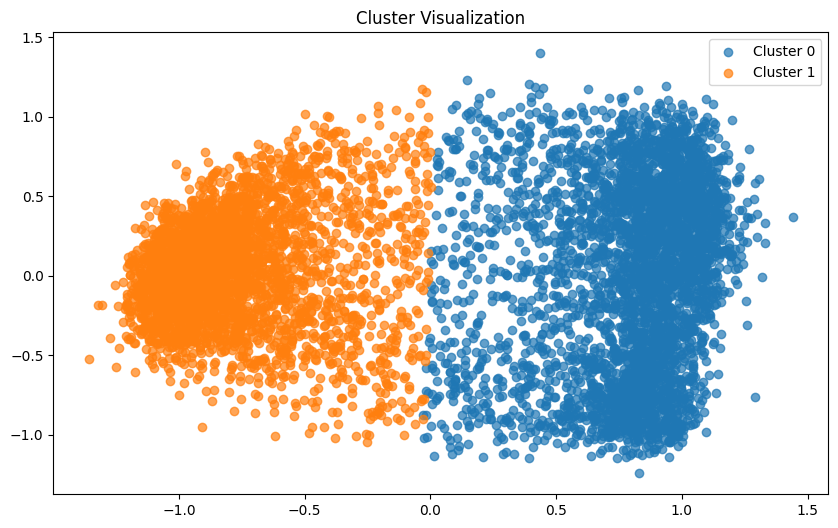

Some measures...
Silhouette Score: 0.08542253077030182
Calinski-Harabasz Index: 690.1206101403101
Davies-Bouldin Index: 3.2551300297251275


In [3]:
utils.clustering(feature_vectors, 2)